In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

import tensorflow
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from keras.models import Model

In [39]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-11-30 11:17:16--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2023-11-30 11:17:17 (7.93 MB/s) - ‘spam.csv’ saved [503663/503663]

--2023-11-30 11:19:25--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2023-11-30 11:19:25 

In [40]:
# !head spam.csv


In [41]:
df = pd.read_csv('/content/spam.csv', encoding = 'ISO-8859-1')

In [42]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
# drop the unnecessary columns
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [44]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.columns = ['label', 'data']

In [46]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
# Create binary labels
df['bin_label'] = df['label'].map({'ham':0, 'spam':1})

In [48]:
df.head()

,label,data,bin_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


,label,data,bin_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [49]:
# Split up the data usin train test split
df_train,df_test, y_train, y_test = tts(df['data'],
                                        df['bin_label'],
                                        test_size = 0.33)

In [50]:
df_train.head()

1763    Joy's father is John. Then John is the NAME of...
3703              Kent vale lor... ÌÏ wait 4 me there ar?
843     Urgent! call 09066350750 from your landline. Y...
4948                    I am in bus on the way to calicut
5378    Free entry to the gr8prizes wkly comp 4 a chan...
Name: data, dtype: object

2280                          R Ì_ comin back for dinner?
3997    We tried to call you re your reply to our sms ...
3584    Heart is empty without love.. Mind is empty wi...
1502                           Don no da:)whats you plan?
1099    Been up to ne thing interesting. Did you have ...
Name: data, dtype: object

In [51]:
y_train.head()

1763    0
3703    0
843     1
4948    0
5378    1
Name: bin_label, dtype: int64

2280    0
3997    1
3584    0
1502    0
1099    0
Name: bin_label, dtype: int64

In [52]:
y_test.head()

4549    0
2889    0
2892    0
5293    0
2112    1
Name: bin_label, dtype: int64

2849    0
1393    0
1606    0
4663    0
4428    0
Name: bin_label, dtype: int64

In [53]:
# Preprocess the text
max_vocab_size = 20000
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(df_train)
seq_train = tokenizer.texts_to_sequences(df_train)
seq_test = tokenizer.texts_to_sequences(df_test)

In [54]:
# get word->integer mapping
word2idx = tokenizer.word_index
v = len(word2idx)
print('# of unique tokens %s'%v)

# of unique tokens 7279
# of unique tokens 7140


In [55]:
data_train = pad_sequences(seq_train)
print('Shape of data for training tensor: ', data_train.shape)

Shape of data for training tensor:  (3733, 189)
Shape of data for training tensor:  (3733, 189)


In [56]:
T = data_train.shape[1]

In [57]:
data_test = pad_sequences(seq_test)
print('Shape of data for training tensor: ', data_test.shape)

Shape of data for training tensor:  (1839, 98)
Shape of data for training tensor:  (1839, 121)


here train seq and test sequence dont have same shape so need to pad the test sequence

In [58]:
data_test = pad_sequences(seq_test,maxlen = T)
print('Shape of data for test: ', data_test.shape)

Shape of data for test:  (1839, 189)
Shape of data for test:  (1839, 189)


In [59]:
# Create the model
# We get to chose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15
i = Input(shape = (T,))
x = Embedding(v+1, D)(i)
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [60]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 20)           145600    
                                                                 
 lstm (LSTM)                 (None, 189, 15)           2160      
                                                                 
 global_max_pooling1d (Glob  (None, 15)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 147776 (577.25 KB)
Trainable params: 147776 (577.25 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [62]:
print("Training of model begins------------------")
r = model.fit(data_train, y_train, epochs = 10,
              validation_data = (data_test, y_test),)

Training of model begins------------------
Epoch 1/10
117/117 [==============================] - 26s 181ms/step - loss: 0.4822 - accuracy: 0.8470 - val_loss: 0.3474 - val_accuracy: 0.8809
Epoch 2/10
117/117 [==============================] - 13s 110ms/step - loss: 0.3817 - accuracy: 0.8586 - val_loss: 0.3255 - val_accuracy: 0.8809
Epoch 3/10
117/117 [==============================] - 11s 94ms/step - loss: 0.3301 - accuracy: 0.8586 - val_loss: 0.2822 - val_accuracy: 0.8809
Epoch 4/10
117/117 [==============================] - 10s 88ms/step - loss: 0.2916 - accuracy: 0.8586 - val_loss: 0.2484 - val_accuracy: 0.8809
Epoch 5/10
117/117 [==============================] - 9s 79ms/step - loss: 0.2459 - accuracy: 0.8586 - val_loss: 0.2054 - val_accuracy: 0.8809
Epoch 6/10
117/117 [==============================] - 11s 93ms/step - loss: 0.1925 - accuracy: 0.8853 - val_loss: 0.1641 - val_accuracy: 0.9810
Epoch 7/10
117/117 [==============================] - 11s 93ms/step - loss: 0.1488 - accurac

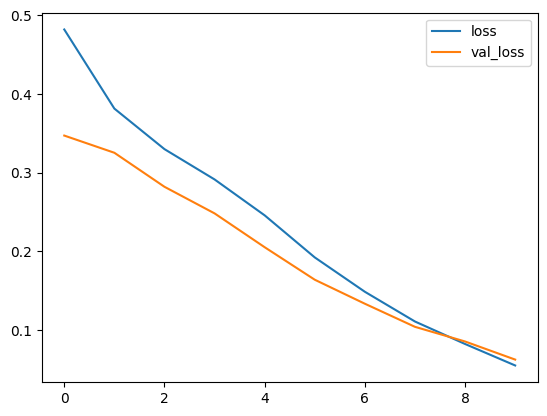

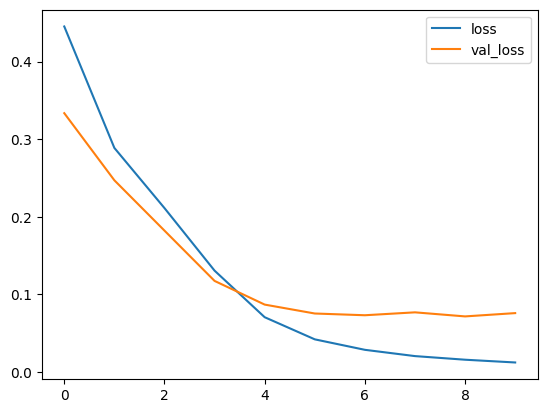

In [63]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend();

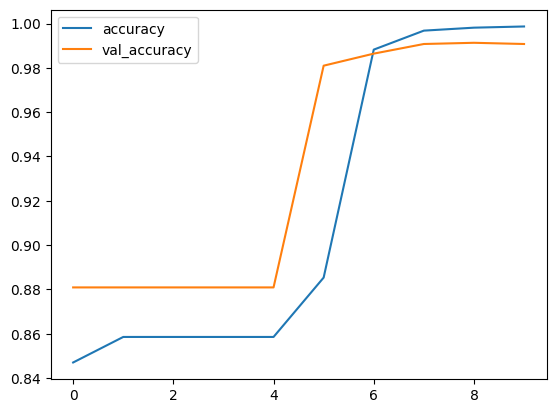

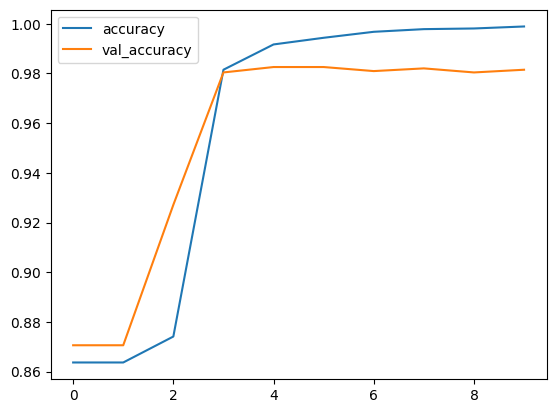

In [64]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend();

In [65]:
prediction = model.predict(data_test)

58/58 [==============================] - 1s 18ms/step


In [66]:
pred_list = []
for i in range(len(prediction)):
  if prediction[i]>0.5:
    pred_list.append(1)
  else:
    pred_list.append(0)

In [67]:
prediction

array([[0.0179452 ],
       [0.04543811],
       [0.01999766],
       ...,
       [0.01825314],
       [0.8955117 ],
       [0.85473245]], dtype=float32)

array([[0.00239518],
       [0.0064472 ],
       [0.00235306],
       ...,
       [0.03605792],
       [0.00333021],
       [0.00223511]], dtype=float32)

In [68]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, w/o normalization")
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [69]:
y_test_ls = []
for i in y_test:
  y_test_ls.append(i)

actual = np.array(y_test_ls)
pred = np.array(pred_list)

Confusion matrix, w/o normalization
[[1618    2]
 [  15  204]]


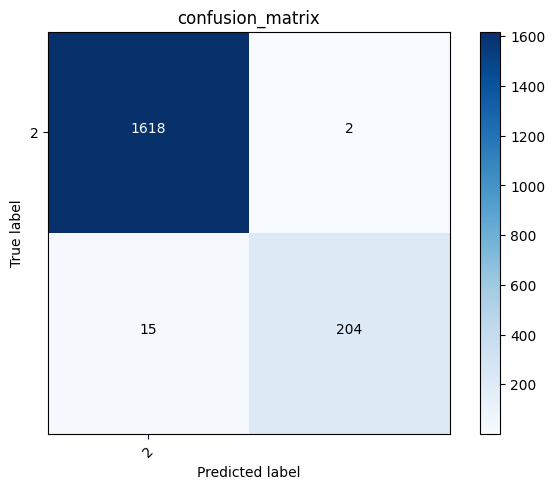

Confusion matrix, w/o normalization
[[1598    3]
 [  31  207]]


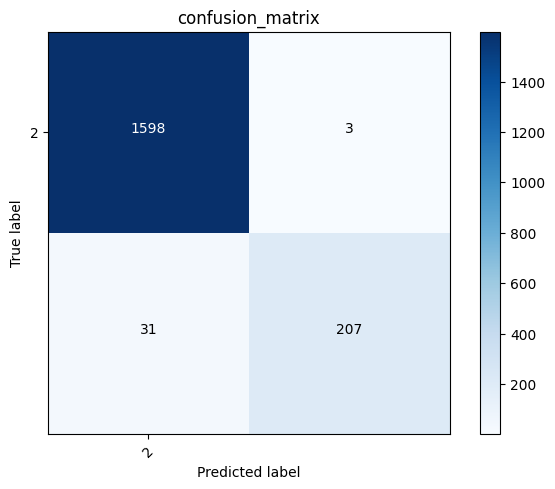

In [70]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, [2])

In [71]:
labels = [0, 1]

In [72]:
actual.shape == pred.shape

True

True

In [73]:
actual.shape

(1839,)

(1839,)

In [74]:
misclassified_idx = np.where(pred_list != y_test)[0]
i = np.random.choice(misclassified_idx)
print(data_test[i],' true label ',y_test[i])
print(data_test[i],' predicted label ',prediction[i])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  112
   63   32   49   62  878    1   33  206  749   32 2293    6  958  217
   92  231  121 1139  245 1629 4089]  true label  0
[   0    0    0    0    0

In [75]:
model.save('spam_clasiifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
misclassified_idx = np.where(pred_list != y_test)[0]